# Logistic Regression

In [20]:
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import torch
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

os.chdir('/content/drive/My Drive/pytorch')


In [13]:
# dtype float32로 설정해야 모델이 인식함
train = pd.read_csv('train.csv',dtype=np.float32)
print(train.shape)


(42000, 785)


In [14]:
target_np = train.label.values
# 정규화
feature_np = train.loc[:,train.columns!='label'].values/255


feature_train, feature_test , target_train, target_test = train_test_split(feature_np,
                                                                           target_np, test_size=0.2, random_state=42)


In [15]:
feature_train.shape, feature_test.shape , target_train.shape, target_test.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [16]:
# train set
ft_train = torch.from_numpy(feature_train)
tg_train = torch.from_numpy(target_train).type(torch.LongTensor)
print(type(ft_train), type(tg_train))

# test set
ft_test = torch.from_numpy(feature_test)
tg_test = torch.from_numpy(target_test).type(torch.LongTensor)

print(type(ft_test),type(tg_test))

batch_size = 100
epochs = 10000

num_epochs = int(epochs / (len(feature_train)/batch_size))
print(num_epochs)

# train set을 100개씩 묶음 33600/100 
# 하나의 배치를 29번씩 학습시킴 10000/336


train = torch.utils.data.TensorDataset(ft_train,tg_train)
test = torch.utils.data.TensorDataset(ft_test,tg_test)





<class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'>
29


In [17]:
train_loader = torch.utils.data.DataLoader(train,batch_size=batch_size,shuffle=False)
test_loader = torch.utils.data.DataLoader(test,batch_size=batch_size,shuffle=False)

In [18]:
feature_np[10].shape

(784,)

Text(0.5, 1.0, '8.0')

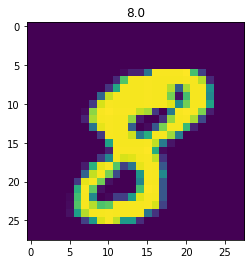

In [21]:
plt.imshow(feature_np[10].reshape(28,28))
plt.title(target_np[10])

In [22]:

class LogisticRegression(nn.Module) :
    def __init__(self,input_dim,output_dim) :
        super(LogisticRegression,self).__init__()
        
        self.linear = nn.Linear(input_dim,output_dim)

        
    def forward(self,x) :
        return self.linear(x)



input_dim= feature_train.shape[1]
output_dim = len(set(target_train))

model = LogisticRegression(input_dim,output_dim)

# 출력층 활성화함수를 softmax를 사용하는 loss func 호출
loss = nn.CrossEntropyLoss()


lr = 0.001
optim = torch.optim.SGD(model.parameters(),lr=lr)


count=0
loss_list = []
iteration_list = []

for epoch in range(num_epochs) :
    for i , (img,label) in enumerate(train_loader) :
        train =Variable(img.view(-1,28*28))
        label = Variable(label)

        # optimizer 초기화
        optim.zero_grad()

        # model 호출
        outputs = model(train)

        cn_loss = loss(outputs,label)
        
        
        cn_loss.backward()
        
        optim.step()
        count+=1
        if count%50 ==0 :
            corr=0
            total =0

            for t_img,t_label in test_loader :
                test = Variable(t_img.view(-1,28*28))
                

                outputs = model(test)
                
                pred = torch.max(outputs.data, 1 )[1]

                total+=len(t_label)

                corr+=(pred==t_label).sum()
                
            acc= 100 *corr /float(total)


            loss_list.append(cn_loss.data)

            iteration_list.append(count)

            if count % 500 == 0:
            # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, cn_loss.data, acc))
            
                

            

Iteration: 500  Loss: 1.7917786836624146  Accuracy: 68.02381134033203%
Iteration: 1000  Loss: 1.5811848640441895  Accuracy: 75.57142639160156%
Iteration: 1500  Loss: 1.2796443700790405  Accuracy: 78.6547622680664%
Iteration: 2000  Loss: 1.2115159034729004  Accuracy: 80.30952453613281%
Iteration: 2500  Loss: 1.0295462608337402  Accuracy: 81.27381134033203%
Iteration: 3000  Loss: 0.9443411827087402  Accuracy: 82.04762268066406%
Iteration: 3500  Loss: 0.8957687616348267  Accuracy: 82.83333587646484%
Iteration: 4000  Loss: 0.746482253074646  Accuracy: 83.41666412353516%
Iteration: 4500  Loss: 0.9703641533851624  Accuracy: 83.80952453613281%
Iteration: 5000  Loss: 0.8049580454826355  Accuracy: 84.16666412353516%
Iteration: 5500  Loss: 0.7471616864204407  Accuracy: 84.41666412353516%
Iteration: 6000  Loss: 0.8643772006034851  Accuracy: 84.61904907226562%
Iteration: 6500  Loss: 0.6634169816970825  Accuracy: 84.80952453613281%
Iteration: 7000  Loss: 0.7082366347312927  Accuracy: 85.08333587646

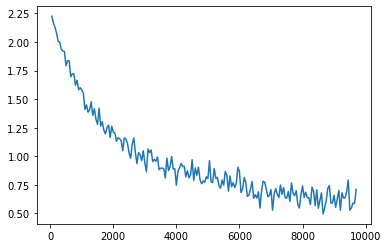

In [23]:
plt.plot(iteration_list,loss_list)

In [45]:
test = pd.read_csv('test.csv',dtype=np.float32)

In [46]:
test.shape

(28000, 784)

In [26]:
torch_test = torch.from_numpy(np.array(test)/255)

# torch_test= torch.utils.data.TensorDataset(torch_test)

In [47]:
pred_list=[]
for i in torch_test:
    tests = Variable(i.view(-1,28*28))
    output= model(tests)
    pred = torch.argmax(output.data)
    # print(pred)
    # print(i)
    pred_list.append(pred)



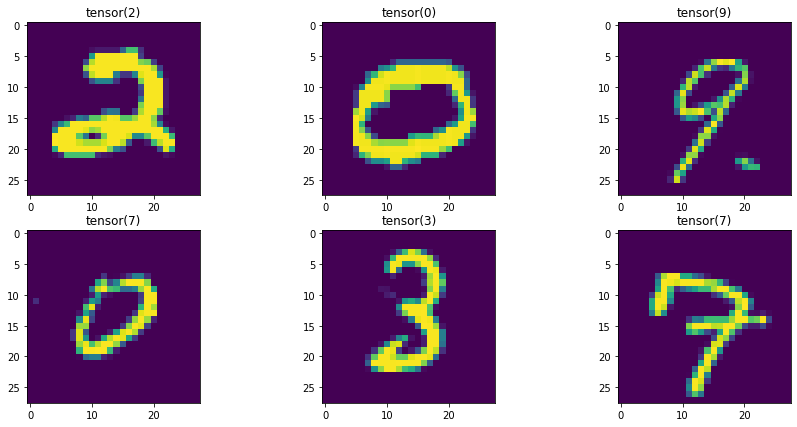

In [77]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)  
fig.set_size_inches(15,7)
for i in range(6) :
    globals()['ax{}'.format(i+1)].imshow(test.values[i].reshape(28,28))
    globals()['ax{}'.format(i+1)].set_title((pred_list[i]))
    
    

In [44]:
# test로 6개의 이미지에 대한 답을 봤을 때, (1,0) 의 0을 7로 예측한 것 외엔 괜찮아보인다.

<function Tensor.values>